## Final Project Submission

Please fill out:
* Student name: Joshua Thomas
* Student pace: self paced / *part time* / full time
* Scheduled project review date/time: 
* Instructor name: Victor Geislinger
* Blog post URL:


### Importing the Required Libraries 

In [1]:
#Data Structure/Mathematical Libraries
import pandas as pd
import numpy as np

#Visualization/Plotting Libraries
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

#Helper functions I've built
import quickfunctions as qf

#Modelling/Validation 
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split #Split the data into test/train portions and fit model to smaller sample
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

### Load the dataset and perform initial analysis
In this dataset, there are 20 different columns (potential features) to build a model from.

In [2]:
housing_data = pd.read_csv('kc_house_data.csv')
housing_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
housing_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Quick Notes on Data Set
* Waterfront has some NaN and zero values, will want to convert these to binary values.
* May want to drop lat/long when building the model.
* See if there is a data dictionary for this data set.
* May want transform zipcode into categorical data type.

* Will want to categorize 'condition, grade, floors' columns. 
* May want to categorize Year Column into different decades.
* Will want to convert sqft_basement to float
* Will want to convert any column that doens't necessarily need to be a float to an integer
* Drop ID's in data set to avoid skewing model.
* There are some columns that are of the 'object' data type. Cast these appropriately
* Convert appropriate values to integers

In [4]:
housing_data.drop('sqft_basement', inplace=True, axis=1) #Contained missing values as well. Also, other more "relevant features were decided upon"
housing_data.drop('yr_renovated', inplace=True, axis=1) #Many values are already 0 and there are a few missing. Will drop this column.
housing_data = housing_data[housing_data['bedrooms'] != 33] #Dropping this value because outlier potentially throws model off

* For the Waterfront Column, set NaN values to zero to signify that there is no water front.
* For View, also set NaN columns equal to zero.
    * Can accomplish this using _pd.fillna()_ or writing for loop to iterate

In [5]:
features = housing_data.columns
# housing_data[features].hist(figsize=(10,8), layout=(4,5))
# housing_data.isna().sum(), housing_data.info()

### Cleaning the Data
Start with evaluating which variables can be transformed into categorical
* Converted Waterfront and Grade.
* Working to use this data for modeling a general price estimate of houses given the features.
* Filling Waterfront, view NaN's with zeros
* There are some columns that have ? as data in the rows. Need to clean these as well.

In [6]:
housing_data['waterfront'].fillna(0, inplace=True) #Filling with zeros if NaN. Avoids inflating price.
housing_data['view'].fillna(0, inplace=True) #Filling with zeros if NaN. Avoids inflating price.

housing_data['price'] = housing_data['price'].astype(int)

waterfront_cat = pd.get_dummies(housing_data['waterfront'], prefix='waterfront')
view_cat = pd.get_dummies(housing_data['view'], prefix='view')
grade_cat = pd.get_dummies(housing_data['grade'], prefix='grade')
bath_cat = pd.get_dummies(housing_data['bathrooms'], prefix='bath')
floors_cat = pd.get_dummies(housing_data['floors'], prefix='floor')
bed_cat = pd.get_dummies(housing_data['bedrooms'], prefix='bed')
zip_cat = pd.get_dummies(housing_data['zipcode'], prefix='zip')
cond_cat = pd.get_dummies(housing_data['condition'], prefix='cond')
yr_cat = pd.get_dummies(housing_data['yr_built'], prefix='yr')

housing_data = pd.concat([housing_data, waterfront_cat, grade_cat, view_cat, bath_cat, floors_cat, bed_cat, zip_cat, cond_cat], axis=1)
housing_data.set_index(keys='id')

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199,cond_1,cond_2,cond_3,cond_4,cond_5
id,,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900,3,1.00,1180,5650,1.0,0.0,0.0,3,...,0,1,0,0,0,0,0,1,0,0
6414100192,12/9/2014,538000,3,2.25,2570,7242,2.0,0.0,0.0,3,...,0,0,0,0,0,0,0,1,0,0
5631500400,2/25/2015,180000,2,1.00,770,10000,1.0,0.0,0.0,3,...,0,0,0,0,0,0,0,1,0,0
2487200875,12/9/2014,604000,4,3.00,1960,5000,1.0,0.0,0.0,5,...,0,0,0,0,0,0,0,0,0,1
1954400510,2/18/2015,510000,3,2.00,1680,8080,1.0,0.0,0.0,3,...,0,0,0,0,0,0,0,1,0,0
7237550310,5/12/2014,1230000,4,4.50,5420,101930,1.0,0.0,0.0,3,...,0,0,0,0,0,0,0,1,0,0
1321400060,6/27/2014,257500,3,2.25,1715,6819,2.0,0.0,0.0,3,...,0,0,0,0,0,0,0,1,0,0
2008000270,1/15/2015,291850,3,1.50,1060,9711,1.0,0.0,0.0,3,...,0,0,0,1,0,0,0,1,0,0
2414600126,4/15/2015,229500,3,1.00,1780,7470,1.0,0.0,0.0,3,...,0,0,0,0,0,0,0,1,0,0


### Taking a look at correlation
* Checking which features have high correlation, looking specifically in my case at the price column for modeling
* Write function to automatically return true values
* Function to get correlations is built in QuickFuncs package/module

In [7]:
corr_dict = qf.QuickFuncs.get_correlations(housing_data, 0.5)  #This is a quick way to check if any of the potential predictor variables have multicollinearity issues.
housing_data.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199,cond_1,cond_2,cond_3,cond_4,cond_5
id,1.000000,-0.016763,0.002328,0.005145,-0.012258,-0.131920,0.018576,-0.003602,0.011762,-0.023721,...,-0.024531,-0.011137,-0.002732,0.022778,-0.049665,0.003470,-0.012784,0.030954,-0.025519,-0.009417
price,-0.016763,1.000000,0.315961,0.525915,0.701929,0.089879,0.256820,0.264308,0.393502,0.036031,...,0.040505,-0.069284,-0.054437,-0.074062,0.083690,-0.019886,-0.051431,0.006966,-0.030751,0.057504
bedrooms,0.002328,0.315961,1.000000,0.527870,0.593178,0.033602,0.183707,-0.002054,0.080741,0.023440,...,0.002932,-0.008149,0.005459,-0.024046,-0.021664,-0.033263,-0.050543,0.007402,-0.009176,0.022992
bathrooms,0.005145,0.525915,0.527870,1.000000,0.755755,0.088368,0.502574,0.063628,0.186011,-0.126443,...,-0.002252,-0.055335,-0.026075,-0.048804,0.008275,-0.042933,-0.075935,0.190769,-0.166771,-0.034699
sqft_living,-0.012258,0.701929,0.593178,0.755755,1.000000,0.173449,0.353941,0.104635,0.281710,-0.059397,...,0.028931,-0.042366,-0.024068,-0.041817,0.010829,-0.033247,-0.063987,0.102034,-0.083865,-0.018210
sqft_lot,-0.131920,0.089879,0.033602,0.088368,0.173449,1.000000,-0.004824,0.021458,0.075052,-0.008806,...,-0.008434,-0.018172,-0.009561,-0.012658,-0.028481,0.006264,0.037870,-0.011603,0.013278,-0.014421
floors,0.018576,0.256820,0.183707,0.502574,0.353941,-0.004824,1.000000,0.020794,0.028401,-0.264013,...,-0.044085,-0.063453,-0.039264,-0.057153,-0.005805,-0.023031,-0.055342,0.317687,-0.257704,-0.120436
waterfront,-0.003602,0.264308,-0.002054,0.063628,0.104635,0.021458,0.020794,1.000000,0.380543,0.016659,...,-0.003787,0.037313,-0.006568,0.035501,-0.005371,0.012406,-0.000955,-0.017504,0.009783,0.013654
view,0.011762,0.393502,0.080741,0.186011,0.281710,0.075052,0.028401,0.380543,1.000000,0.045663,...,0.082708,0.043645,-0.008967,0.053908,0.050895,0.003700,-0.018256,-0.036969,0.022447,0.034308
condition,-0.023721,0.036031,0.023440,-0.126443,-0.059397,-0.008806,-0.264013,0.016659,0.045663,1.000000,...,0.014178,-0.015187,-0.009653,0.005833,0.018414,-0.135850,-0.193054,-0.856953,0.541899,0.714642


### Scaling and Normalizing Features
Features to Scale/Normalize: Sq.Ft, Price

In [8]:
scaled_price = np.log(housing_data['price'])
price = housing_data['price']
condition = np.log(housing_data['condition'])
scaled_living = np.log(housing_data['sqft_living'])
scaled_lot = np.log(housing_data['sqft_lot'])
scaled_above = np.log(housing_data['sqft_above'])

## What are the most important features that influence home price?
* Extracted highly correlated variables
* Check distrbutions of features
* Check for multicollinearity in features
* See if any features need to be adjusted.

In [9]:
features = pd.DataFrame([], index=[])

#Living/Lot size are highly correlated, but leaving them both in as they both influence the price heavily. 
features['scaled_living'] = scaled_living
features['scaled_lot'] = scaled_lot


features = pd.concat([features, zip_cat, yr_cat, waterfront_cat, bed_cat, grade_cat], axis=1)
features.drop(['waterfront_0.0'], axis=1, inplace=True)

#Normalize/Scale features for prices
#Grades need to be turned in to Categorical Variable

#Grade vs Condition
#Grade seems to provide a more reliable model and adding condition would seem "redundant"/highly correlated.

### Begin Modeling Data

In [10]:
features_const = sm.add_constant(features)
model = sm.OLS(scaled_price, features_const).fit()

C:\Users\Jthom\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [11]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     713.8
Date:                Thu, 09 May 2019   Prob (F-statistic):               0.00
Time:                        17:13:33   Log-Likelihood:                 5537.3
No. Observations:               21596   AIC:                        -1.066e+04
Df Residuals:                   21388   BIC:                            -8999.
Df Model:                         207                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              7.3394      0.046    159.991      0.000       7.250       7.429
scaled_living      0.4838      0.006     79.706      0.000       0.472       0.496
scaled_lot         0.0771      0.002     34.594      0.000       0.073       0.081
zip_98001         -0.3815      0.010    -37.941      0.000      -0.401      -0.362
zip_98002         -0.3763      0.013    -28.017      0.000      -0.403      -0.350
zip_98003         -0.3390      0.011    -29.929      0.000      -0.361      -0.317
zip_98004          0.7697      0.011     71.023      0.000       0.748       0.791
zip_98005          0.3775      0.015     25.760      0.000       0.349       0.406
zip_98006          0.3197      0.009     36.531      0.000       0.303       0.337
zip_98007          0.3081      0.016     19.367      0.000       0.277       0.339
zip_98008          0.3308      0.011     28.874      0.000       0.308       0.353
zip_98010         -0.1499      0.019     -7.897      0.000      -0.187      -0.113
zip_98011          0.0828      0.013      6.139      0.000       0.056       0.109
zip_98014         -0.1110      0.017     -6.427      0.000      -0.145      -0.077
zip_98019         -0.0747      0.014     -5.373      0.000      -0.102      -0.047
zip_98022         -0.3003      0.013    -23.779      0.000      -0.325      -0.276
zip_98023         -0.3823      0.009    -44.149      0.000      -0.399      -0.365
zip_98024          0.0182      0.021      0.858      0.391      -0.023       0.060
zip_98027          0.1386      0.009     14.653      0.000       0.120       0.157
zip_98028          0.0465      0.011      4.137      0.000       0.024       0.068
zip_98029          0.2390      0.011     22.171      0.000       0.218       0.260
zip_98030         -0.3244      0.012    -27.344      0.000      -0.348      -0.301
zip_98031         -0.2805      0.012    -24.323      0.000      -0.303      -0.258
zip_98032         -0.3829      0.017    -22.769      0.000      -0.416      -0.350
zip_98033          0.4339      0.009     47.440      0.000       0.416       0.452
zip_98034          0.1929      0.008     23.015      0.000       0.176       0.209
zip_98038         -0.2059      0.008    -25.019      0.000      -0.222      -0.190
zip_98039          0.9457      0.027     35.518      0.000       0.894       0.998
zip_98040          0.5720      0.012     49.665      0.000       0.549       0.595
zip_98042         -0.2945      0.008    -35.150      0.000      -0.311      -0.278
zip_98045         -0.0732      0.013     -5.641      0.000      -0.099      -0.048
zip_98052          0.2700      0.008     33.366      0.000       0.254       0.286
zip_98053          0.1932      0.010     19.576      0.000       0.174       0.212
zip_98055         -0.2240      0.012    -19.433      0.000      -0.247      -0.201
zip_98056   

### Details on Model
* 85% Confidence on predicting home prices in data set.
* Features selected are: Year(Categorical), Waterfront(Categorical), Zipcode(Categorical), Condition(Categorical)
    * Living Sq Ft(Numerical), Lot Size(Numerical)
* Features and data type were chosen by best interpretation of the data. Data casted as numerical was selected because the data implies that "more is better" in the fact that SQ Footage of Living/Lot Size and Higher Condition equated with higher costs.
* Features with ambiguous data(Waterfront) were set equal to 0 or 1 to signify that the potential house has a waterfront view.
    * This information could be misleading from looking at the model because some information was lost flattening to binary values.
* Zip Code appeared to have a large impact on the model.
    * Average condition of the houses in a particular Zip Code did not necessarily correlate with higher prices
    * Average Lot Size of a Zip code
* Waterfront Category contributes quite a bit to the pricing of home. Dropping the waterfront 0 column reduces the impact that this category has on the price and I believe more accurately predicts the home price without inflation.
* Year category is accurately reflected as in general, the newer the house, the more the price is increased. Outliers may affect the coefficients of the price since a house may contain more desirable features.

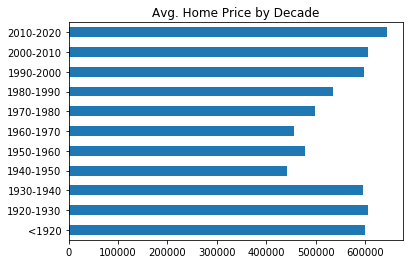

In [12]:
# est_price = list(model.predict())
# plt.figure(figsize=(12,8))
# plt.hist(housing_data['yr_built'])

#Bin the years by two decades and plot them
bin1 = housing_data[housing_data['yr_built'] <= 1920]
bin2 = housing_data[(housing_data['yr_built'] > 1920) & (housing_data['yr_built'] <= 1930)]
bin3 = housing_data[(housing_data['yr_built'] > 1930) & (housing_data['yr_built'] <= 1940)]
bin4 = housing_data[(housing_data['yr_built'] > 1940) & (housing_data['yr_built'] <= 1950)]
bin5 = housing_data[(housing_data['yr_built'] > 1950) & (housing_data['yr_built'] <= 1960)]
bin6 = housing_data[(housing_data['yr_built'] > 1960) & (housing_data['yr_built'] <= 1970)]
bin7 = housing_data[(housing_data['yr_built'] > 1970) & (housing_data['yr_built'] <= 1980)]
bin8 = housing_data[(housing_data['yr_built'] > 1980) & (housing_data['yr_built'] <= 1990)]
bin9 = housing_data[(housing_data['yr_built'] > 1990) & (housing_data['yr_built'] <= 2000)]
bin10 = housing_data[(housing_data['yr_built'] > 2000) & (housing_data['yr_built'] <= 2010)]
bin11 = housing_data[(housing_data['yr_built'] > 2010) & (housing_data['yr_built'] <= 2020)]

bin1_pmean = bin1['price'].mean()
bin2_pmean = bin2['price'].mean()
bin3_pmean = bin3['price'].mean()
bin4_pmean = bin4['price'].mean()
bin5_pmean = bin5['price'].mean()
bin6_pmean = bin6['price'].mean()
bin7_pmean = bin7['price'].mean()
bin8_pmean = bin8['price'].mean()
bin9_pmean = bin9['price'].mean()
bin10_pmean = bin10['price'].mean()
bin11_pmean = bin11['price'].mean()

pricemean_year = pd.DataFrame([bin1_pmean, bin2_pmean, bin3_pmean, bin4_pmean, bin5_pmean, bin6_pmean, 
                               bin7_pmean, bin8_pmean, bin9_pmean, bin10_pmean, bin11_pmean], 
                              columns=['Avg Home Price'], 
                              index=['<1920', '1920-1930', '1930-1940', '1940-1950', '1950-1960','1960-1970', 
                                    '1970-1980', '1980-1990', '1990-2000', '2000-2010', '2010-2020'])
pricemean_year = pricemean_year.astype(int)

#Show how year effects price
pricemean_year.plot(kind='barh', title='Avg. Home Price by Decade', legend=False)

In [13]:
#Plot difference between waterfront view and non-waterfront view
housing_data.groupby(['waterfront_1.0'])['price'].mean()

waterfront_1.0
0    5.322812e+05
1    1.717215e+06
Name: price, dtype: float64

## Visualizing Important Features for Price Prediction Model

In [14]:
# 5 Most Expensive Zip Code??
# Average cost per house condition?
# Best Zip Code to look for housing
# "Oldest" Zip Code

zip_count = pd.Series(list(housing_data[zip_cat.columns].sum()), name='count')
#Extracting home count per zip code. Order is preserved from categorical casting

In [15]:
zip_price = pd.DataFrame(housing_data.groupby(['zipcode'])['price'].mean().astype(int))
zip_price.reset_index(inplace=True) #Took a couple hours to fix this.... 
zip_price = pd.concat([zip_price,zip_count], axis=1)
zip_price.sort_values('price', ascending=False)

,zipcode,price,count
24,98039,2161300,50
3,98004,1356523,317
25,98040,1194873,282
48,98112,1096239,269
41,98102,899607,104
47,98109,880077,109
43,98105,863228,229
5,98006,859938,498
53,98119,849714,184
4,98005,810289,168


### Where is the best Zip Code to purchase an affordable, good condition home?
* Compare the median home price with the average conditions. Also the size of the home
* Lot size varies drastically because some areas may be more rural.


In [16]:
zip_cond = pd.DataFrame(housing_data.groupby(['zipcode'])['sqft_living', 'sqft_lot', 'price', 'condition'].mean())
zip_cond['condition'].describe()
zip_cond.sort_values(['price', 'condition'], ascending=False, inplace=True)
zip_cond

,sqft_living,sqft_lot,price,condition
zipcode,,,,
98039,3800.900000,17403.560000,2.161300e+06,3.480000
98004,2909.022082,13104.220820,1.356524e+06,3.495268
98040,3106.833333,13704.464539,1.194874e+06,3.787234
98112,2498.743494,4990.431227,1.096239e+06,3.516729
98102,2151.048077,3605.153846,8.996077e+05,3.375000
98109,2054.779817,3621.082569,8.800778e+05,3.477064
98105,2150.576419,5121.165939,8.632289e+05,3.628821
98006,2888.295181,13383.435743,8.599386e+05,3.658635
98119,2005.614130,3615.217391,8.497148e+05,3.375000


## Model Validation/Evaluation

In [17]:
#Am I using the correct amount of data to train the model?
#Model could be overfit because rerunning model introduces high MSE for Test Data
X_train, X_test, y_train, y_test = train_test_split(features, scaled_price, test_size=0.2)
print(len(X_train), len(X_test), len(y_train), len(y_test))
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

17276 4320 17276 4320


In [18]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test
mse_train = np.sum((y_train - y_hat_train)**2)/len(y_train)
mse_test = np.sum((y_test - y_hat_test)**2)/len(y_test)

In [19]:
print('Train MSE: ', mse_train)
print('Test MSE ', mse_test)

Train MSE:  0.03531762618072777
Test MSE  0.034545850310462436


### Performing  Basic Cross Validation of the Model
* Running Test-Train splits 50 times
* Also running K-Fold Cross Validation as well

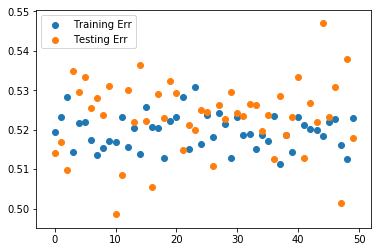

In [20]:
num = 50
train_err = []
test_err = []
for x in range(num):
    X_train, X_test, y_train, y_test = train_test_split(features, scaled_price, test_size=0.2)
    from sklearn.linear_model import LinearRegression
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    train_err.append(np.sum((y_train - y_hat_train)**2)/len(y_train))
    test_err.append(np.sum((y_test - y_hat_test)**2)/len(y_test))
    
plt.scatter(list(range(num)), train_err, label='Training Err')
plt.scatter(list(range(num)), test_err, label='Testing Err')
plt.legend()